In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model, Input
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.applications.inception_v3 import InceptionV3

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/cyclone_dataset/insat_3d_ds - Sheet.csv')
df.head()

img_name  label
0     25.jpg     25
1     27.jpg     27
2     28.jpg     28
3     30.jpg     30
4  30(1).jpg     30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


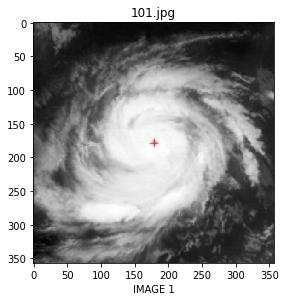

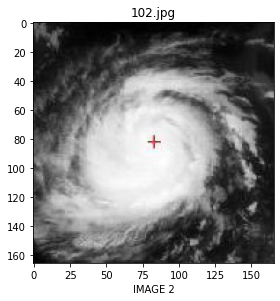

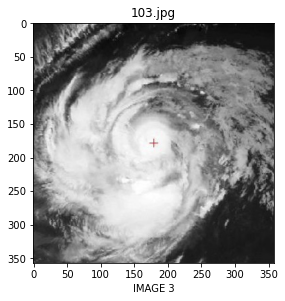

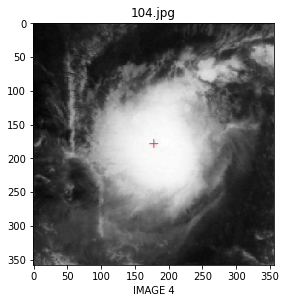

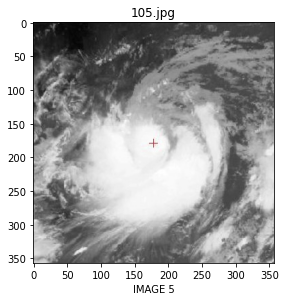

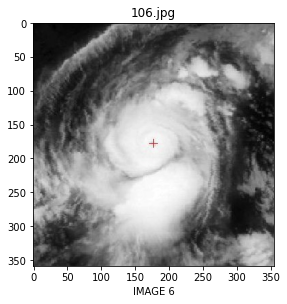

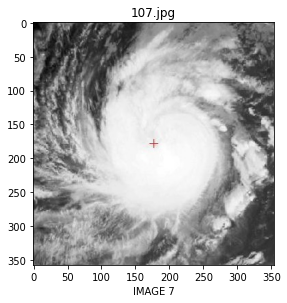

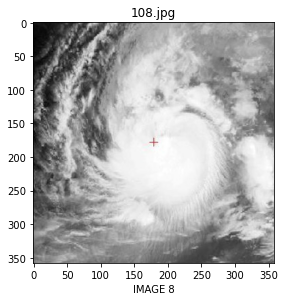

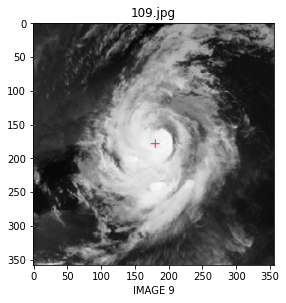

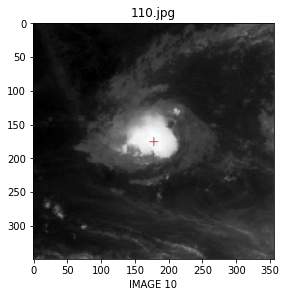

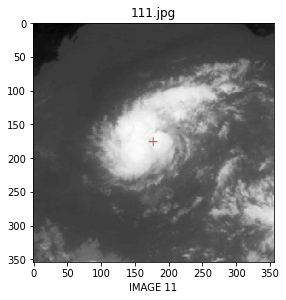

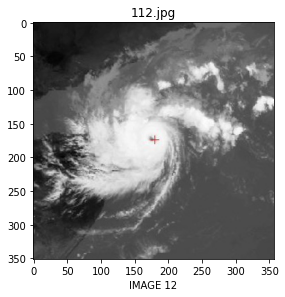

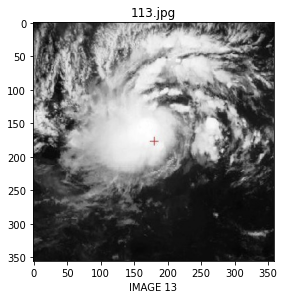

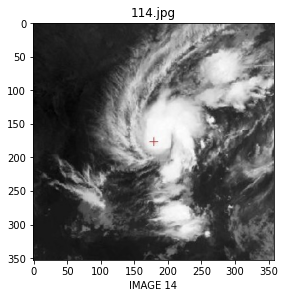

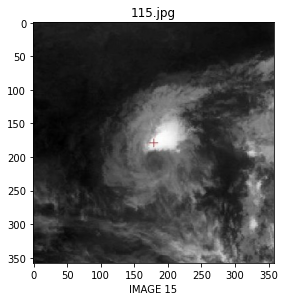

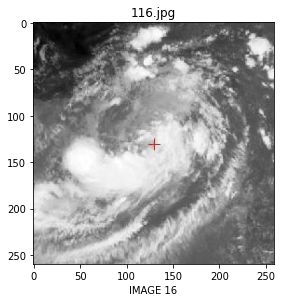

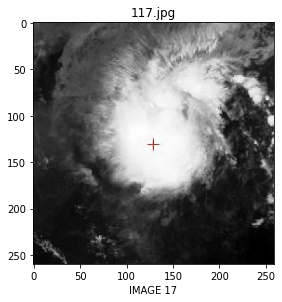

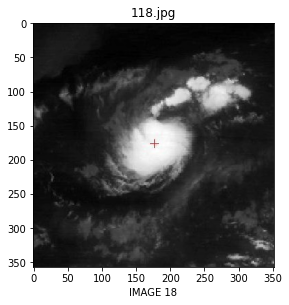

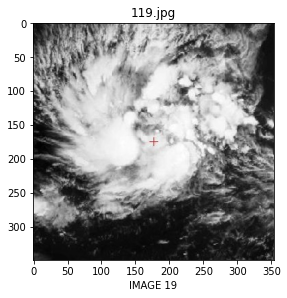

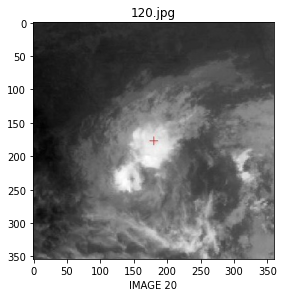

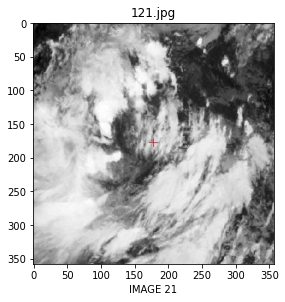

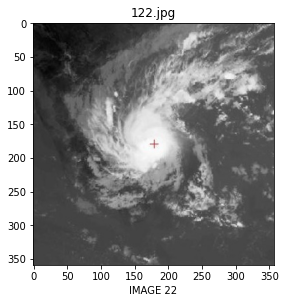

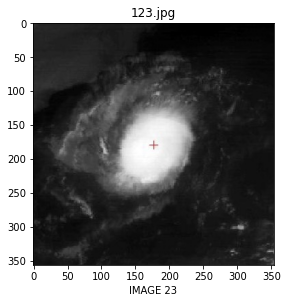

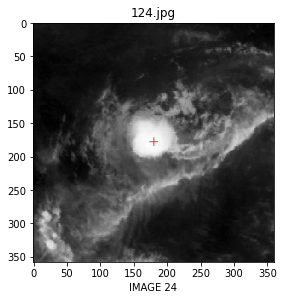

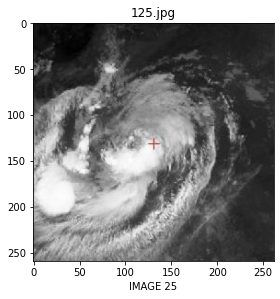

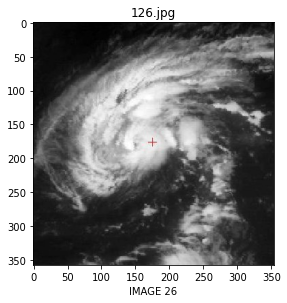

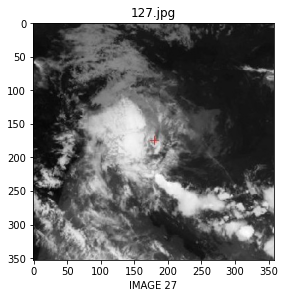

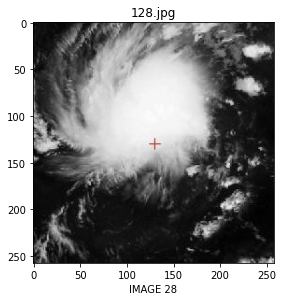

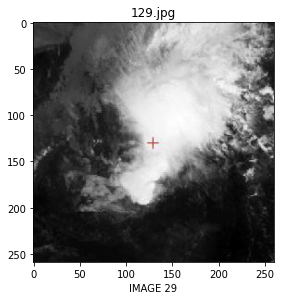

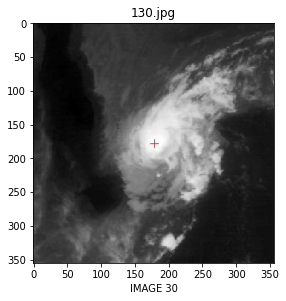

In [6]:
paths = glob.glob("/content/drive/MyDrive/Datasets/cyclone_dataset/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/*.jpg")
i=1 
for path in paths[:30]:
  fig = plt.figure(figsize=(25, 35))
  ax = fig.add_subplot(6, 5, i)
  img = f"image {i}"
  plt.imshow(load_img(path))
  if i<10:
    plt.title(f"10{i}.jpg")
  else:
    plt.title(f"1{i}.jpg")
    
  plt.xlabel(img.upper())
  i+=1
plt.savefig("raw_img")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


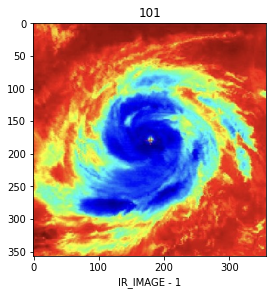

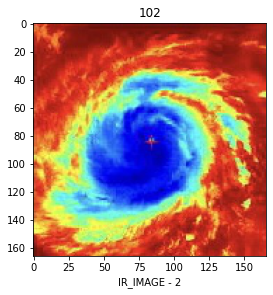

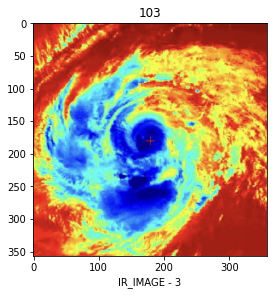

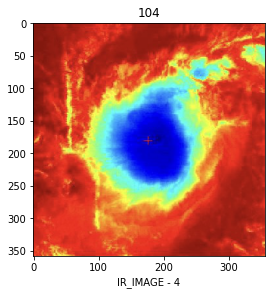

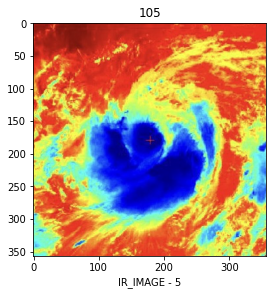

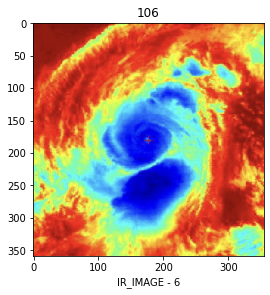

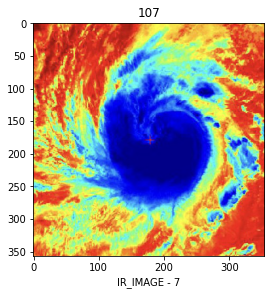

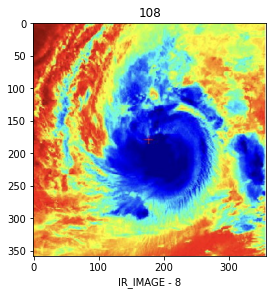

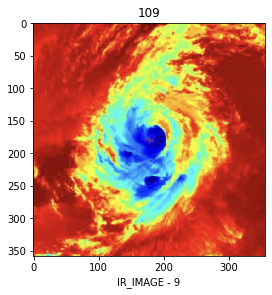

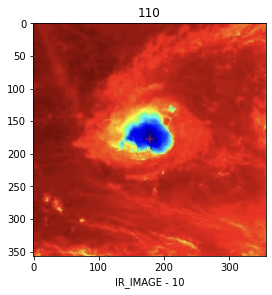

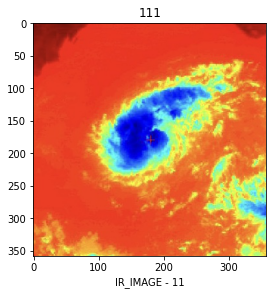

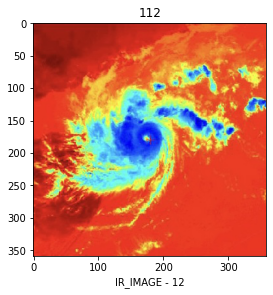

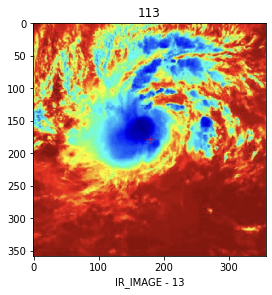

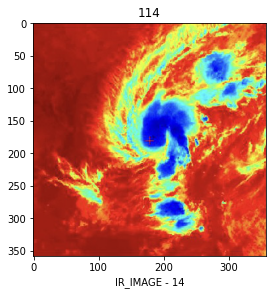

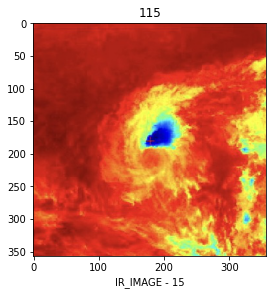

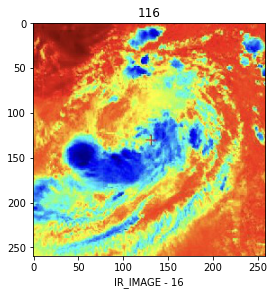

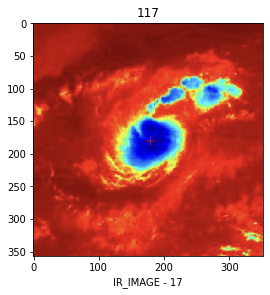

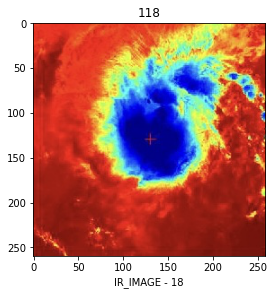

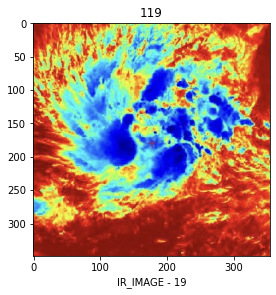

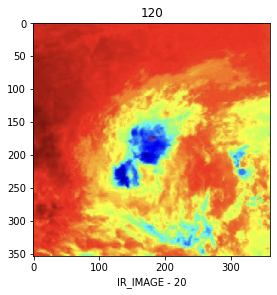

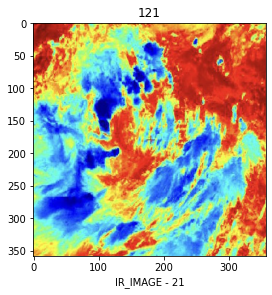

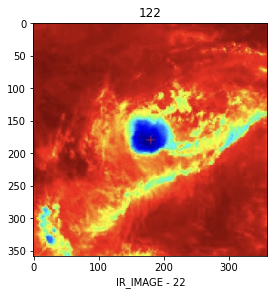

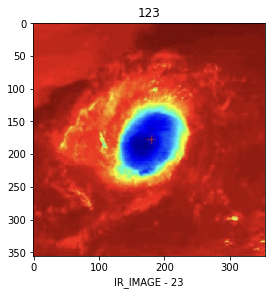

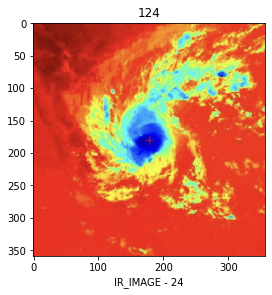

In [9]:
hm_path = glob.glob("/content/drive/MyDrive/Datasets/cyclone_dataset/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/*.jpg")
i=1
for path in hm_path[:24]:
  fig = plt.figure(figsize=(20,30))
  ax = fig.add_subplot(6,4,i)
  plt.imshow(load_img(path))
  if i<10:
    ax.set_title(f"10{i}")

  else:
    ax.set_title(f"1{i}")

  ax.set_xlabel(f"IR_IMAGE - {i}")
  i+=1
plt.savefig("cyclone_infrared_img.svg")

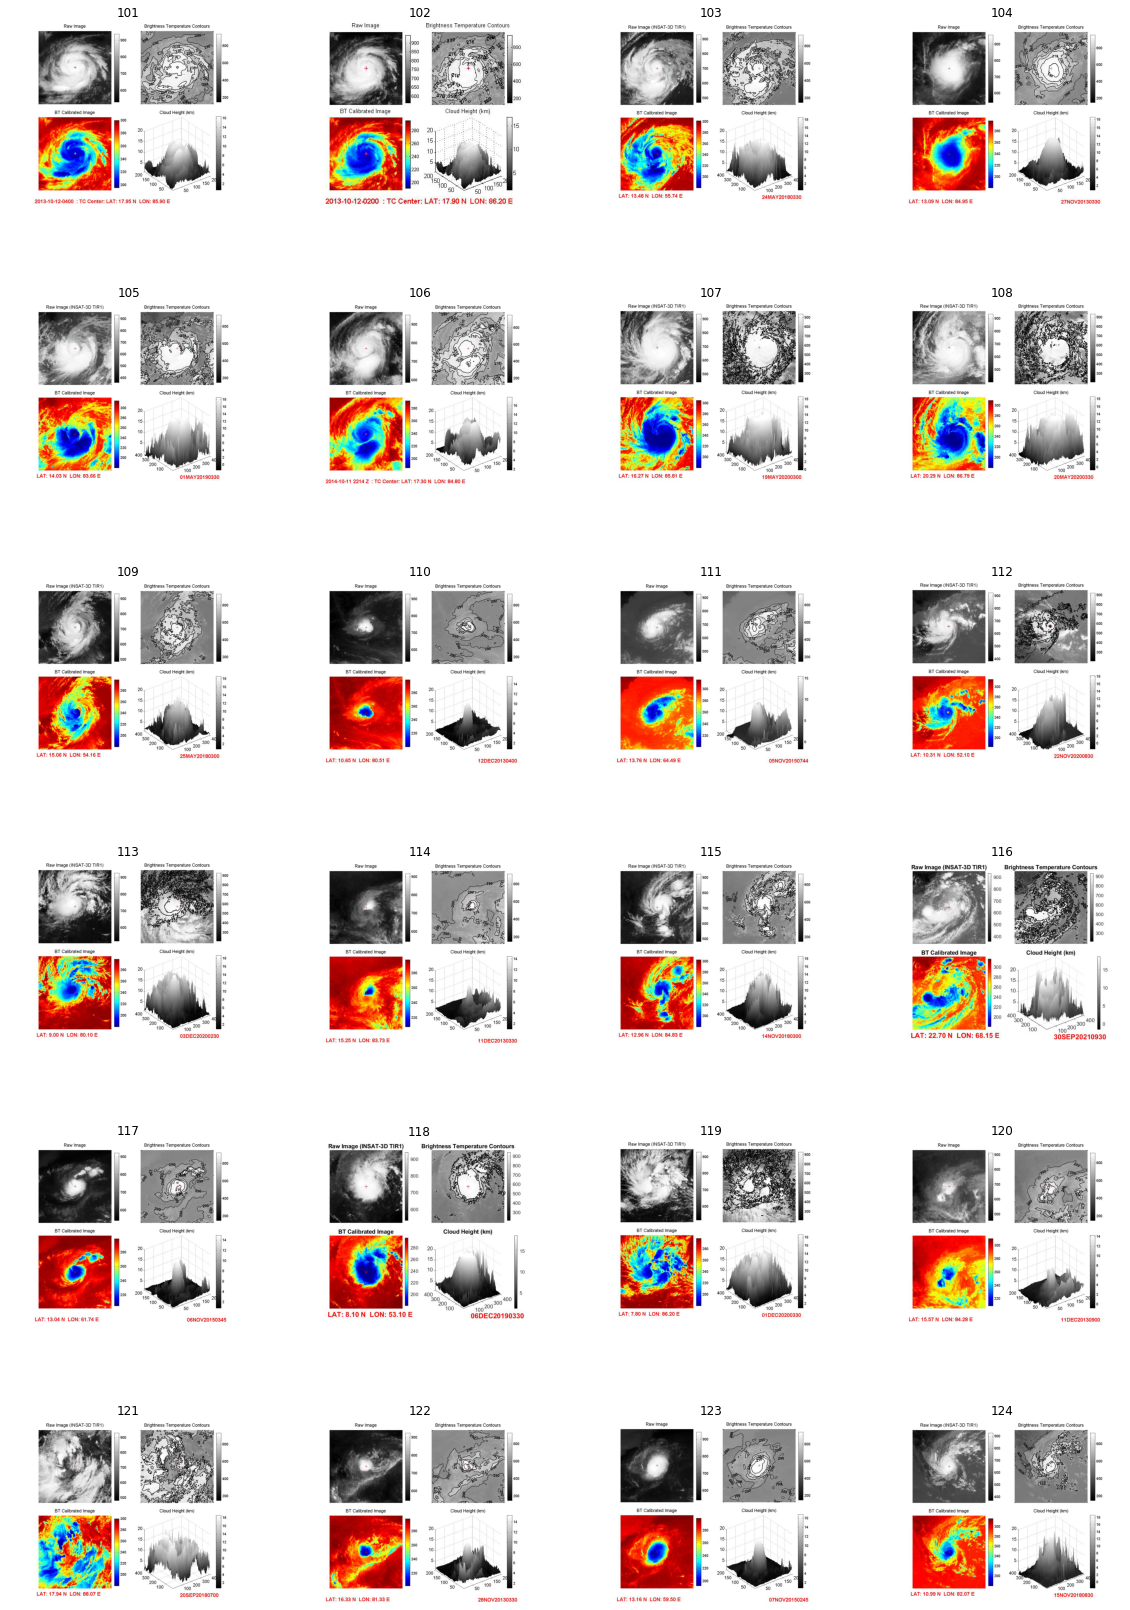

In [8]:
ref_path = glob.glob("/content/drive/MyDrive/Datasets/cyclone_dataset/insat3d_for_reference_ds/CYCLONE_DATASET/*.jpeg")
i=1
fig = plt.figure(figsize=(20,30))

for path in ref_path[:24]:
  ax = fig.add_subplot(6,4,i)
  plt.imshow(load_img(path))
  ax.set_title(f"{100+i}")


  ax.set_xlabel(f"IR_IMAGE - {i}")
  i+=1
  plt.axis("off") 

plt.savefig("each_image_analysis.svg")

In [11]:
def dataset_preparation(path):
    x_train=[]
    y_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [12]:
path = "/content/drive/MyDrive/Datasets/cyclone_dataset/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL"
test_path = "/content/drive/MyDrive/Datasets/cyclone_dataset/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"

train_data = dataset_preparation(path)

test_data = dataset_preparation(test_path)

print(f"Shape of train data is {train_data.shape}.")
print(f"Size of train data is {len(train_data)}.")
print(f"Shape of test data is {test_data.shape}.")
print(f"Size of test data is {len(test_data)}.")

Shape of train data is (139, 150, 150, 3).
Size of train data is 139.
Shape of test data is (136, 150, 150, 3).
Size of test data is 136.


In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
training_data = train_datagen.flow_from_dataframe(dataframe=df,directory='/content/drive/MyDrive/Datasets/cyclone_dataset/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/',
                                                  subset="training",
                                               x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')

Found 131 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1,activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 148, 148, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0

In [ ]:
model.compile(optimizer= Adam(learning_rate=0.01),loss='mae',metrics=['RootMeanSquaredError'])


In [ ]:
history = model.fit_generator(
       training_data,
       epochs=10,
       )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10


InvalidArgumentError: ignored

In [14]:
pre_trained_model = InceptionV3(weights="imagenet", include_top=False, 
                                input_tensor=Input(shape=(512, 512, 3)))
pre_trained_model.summary()

pre_trained_model.trainable = False

flatten = pre_trained_model.output
flatten = Flatten()(flatten)

bboxHead = Dense(64, activation="relu")(flatten)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(1, activation="linear")(bboxHead)

model = Model(inputs=pre_trained_model.input, outputs=bboxHead)

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)           

In [15]:
model.compile(optimizer = Adam(1e-3), 
             loss = 'mae', 
             metrics = [RootMeanSquaredError()])

call_back = ModelCheckpoint('Model.h5',monitor='loss',verbose=1,save_best_only=True)

# Compiling the model with optimizer and loss function

model.fit_generator(training_data,epochs=100,callbacks=[call_back])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 27.0519 - root_mean_squared_error: 34.8580
Epoch 1: loss improved from inf to 27.05189, saving model to Model.h5
9/9 [==============================] - 22s 548ms/step - loss: 27.0519 - root_mean_squared_error: 34.8580
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 24.2988 - root_mean_squared_error: 29.7059
Epoch 2: loss improved from 27.05189 to 24.29881, saving model to Model.h5
9/9 [==============================] - 4s 454ms/step - loss: 24.2988 - root_mean_squared_error: 29.7059
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 15.2118 - root_mean_squared_error: 19.8856
Epoch 3: loss improved from 24.29881 to 15.21178, saving model to Model.h5
9/9 [==============================] - 3s 379ms/step - loss: 15.2118 - root_mean_squared_error: 19.8856
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 12.9864 - root_mean_squared_error: 16.9842
Epoch 4: loss improved from

In [17]:
# Loading the model

model = models.load_model('Model.h5')

model.evaluate(training_data)

9/9 [==============================] - 3s 164ms/step - loss: 1.8702 - root_mean_squared_error: 2.2978


[1.870211124420166, 2.2978103160858154]

In [20]:
predictions = pd.DataFrame(model.predict(training_data,verbose=1))
predictions

9/9 [==============================] - 2s 182ms/step


0
0    71.618874
1    45.945309
2    49.475536
3    39.589043
4    45.714970
..         ...
126  74.232201
127  29.262482
128  86.904259
129  42.893978
130  66.884453

[131 rows x 1 columns]

In [29]:
# Changing the name of the column
predictions.columns = ['Intensity']
predictions.head()

Intensity
0  71.618874
1  45.945309
2  49.475536
3  39.589043
4  45.714970

In [31]:
# Saving the predictions into csv
predictions.to_csv('cyclone_intensity')